Working with notebooks
==================

In [1]:
import argparse
import sys
from pathlib import Path

import cv2
import numpy as np
import pandas as pd
import yaml
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import feature, measure, morphology, segmentation

import matplotlib.pyplot as plt
import matplotlib.colors as colors


ROOT = "/data/shared/mzb-workflow/"
sys.path.append(f"{ROOT}")
from mzbsuite.skeletons.mzb_skeletons_helpers import paint_image


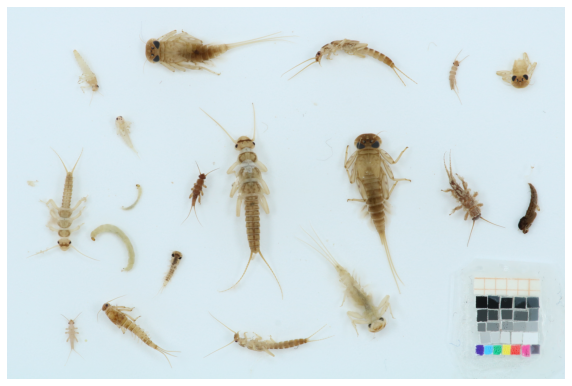

In [2]:
# blb = cv2.imread(f'{ROOT}data/learning_sets/project_portable_flume/skeletonization/images/31_b1_heptagenidae_01_clip_15_rgb.png') 
fma = cv2.imread(f'{ROOT}data/raw/project_portable_flume/site_number_31/Benthos_1/31_B1_mixed_01.jpg')
fma = cv2.cvtColor(fma, cv2.COLOR_BGR2RGB)
# fma = np.transpose(fma,(1,0,2))[::-1,:,:]

plt.figure(figsize=(10,10))
plt.imshow(fma)
plt.axis("off"); 

In [3]:
rr = measure.regionprops(fma)
area = [[rr.label, rr.area, rr.centroid] for rr in rr]
# area = [[rr.index, rr.area] for rr in rr]
# area = sorted(area, key=lambda x: x[1], reverse=True)
# area = np.array(area)
# area = area[0,:]

# area = area[area[1]>7500]

print(area[0, : ])

if 0: 
    clean_mask = np.zeros_like(fma)
    for i, (ind, ar, _) in enumerate(area):
        if ar > 7500:
            clean_mask[morphology.dilation(fma == ind, np.ones((3,3)))] = i+1

    regions = i
    plt.figure(figsize=(10,10))
    plt.imshow(clean_mask)

TypeError: list indices must be integers or slices, not tuple

In [ ]:
import matplotlib.colors

cmap = plt.cm.jet(np.linspace(0,1,regions))
# cmaplist = [cmap(i) for i in len(cmap)]
cmap[0] = (1.0,1.0,1.0,1.0)
comap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm', cmap, regions)

f, a = plt.subplots(1,1,figsize=(10,10)) 
a.imshow(clean_mask, cmap=comap)
a.axis("off")

for i, (ind, are, coo) in enumerate(area):
    if are > 7500:
        if ind != 0:
            a.text(np.mean(coo[1]), np.mean(coo[0]), f"{ind}", color="black", fontsize=12)
        # clean_mask[fma[:,:,0] == ind] = i+1

In [ ]:
area

In [ ]:
# blb = cv2.imread(f'{ROOT}data/learning_sets/project_portable_flume/skeletonization/images/31_b1_heptagenidae_01_clip_15_rgb.png') 
blb = cv2.imread(f'{ROOT}data/derived_v2/project_portable_flume/blobs/31_b1_mixed_01_1_rgb.jpg')
blb = cv2.cvtColor(blb, cv2.COLOR_BGR2RGB)
blb = np.transpose(blb,(1,0,2))[::-1,:,:]
blb[:,1:10] = 0; blb[:,-10:-1] = 0; blb[1:10,:] = 0; blb[-10:-1,:] = 0

msk = cv2.imread(f'{ROOT}data/derived_v2/project_portable_flume/blobs/31_b1_mixed_01_1_mask.jpg')
msk = cv2.cvtColor(msk, cv2.COLOR_BGR2GRAY)
msk = np.transpose(msk,(1,0))[::-1,:]

f, a = plt.subplots(1,2)
a[0].imshow(blb)
a[0].axis("off")
a[1].imshow(msk, cmap="gray")
a[1].axis("off")
f.tight_layout()

In [ ]:
# read the skeleton image and convert to grayscale 
msk_a = cv2.imread(f'{ROOT}data/derived_V2/project_portable_flume/skeletons/automatic_skeletons/31_b1_heptagenidae_01_clip_1_mask_skel.jpg')
msk_a = cv2.cvtColor(msk_a, cv2.COLOR_BGR2RGB)[:,:,0] > 0
msk_a = np.transpose(msk_a,(1,0))[::-1,:]

# replace valus with growing index
val_to_replace = np.unique(msk_a)[1:]
for i,v in enumerate(val_to_replace):
    msk_a[msk_a==v] = i+1

msk_a = morphology.thin(msk_a) #, morphology.disk(2)).astype(int)
msk_a = morphology.dilation(msk_a, morphology.disk(2)).astype(int)
# msk_a[msk_a > 0] += 50

# overlay red skeleton on blob
mm_merged_autom = paint_image(blb, msk_a, color=[0,20,200])

f, a = plt.subplots(1,2, figsize=(10,10))
a[0].imshow(msk_a, cmap="Blues") #, cmap=cmap, norm=norm)
a[0].axis("off"); 
a[1].imshow(mm_merged_autom) #, cmap=cmap, norm=norm)
a[1].axis("off"); 

In [ ]:
print(mm.shape)

In [ ]:
# read the skeleton image and convert to grayscale 
msk_b = cv2.imread(f'{ROOT}data/derived/project_portable_flume/skeletons/supervised_skeletons/31_b1_heptagenidae_01_clip_15_body.jpg')
msk_b = cv2.cvtColor(msk_b, cv2.COLOR_BGR2RGB)[:,:,0] > 0
msk_h = cv2.imread(f'{ROOT}data/derived/project_portable_flume/skeletons/supervised_skeletons/31_b1_heptagenidae_01_clip_15_head.jpg')
msk_h = cv2.cvtColor(msk_h, cv2.COLOR_BGR2RGB)[:,:,0] > 0

msk_b = morphology.thin(msk_b) #, morphology.disk(2)).astype(int)
msk_b = morphology.dilation(msk_b, morphology.disk(2)).astype(int)
msk_h = morphology.thin(msk_h) #, morphology.disk(2)).astype(int)
msk_h = morphology.dilation(msk_h, morphology.disk(2)).astype(int)

# overlay red skeleton on blob
mm_merge = paint_image(blb, msk_b[:-1,:-1], color=[0,20,200])
mm_merge = paint_image(mm_merge, msk_h[:-1,:-1], color=[0,20,200])

f, a = plt.subplots(1,2, figsize=(10,10))
a[0].imshow(50 + (msk_h[:-1,:-1] | msk_b[:-1,:-1]).astype(int), cmap="Blues") #, cmap=cmap, norm=norm)
a[0].axis("off"); 
a[1].imshow(mm_merge) #, cmap=cmap, norm=norm)
a[1].axis("off"); 

